# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
#Read in csv for GoBike trip data
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
#Basic information about the dataset
print(df.shape)
print(df.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


In [6]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
#convert start & end times to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [9]:
#quickly determine time period for dataset
print(df.start_time.min())
print(df.end_time.max())

2019-02-01 00:00:20.636000
2019-03-01 08:01:55.975000


#### Tidying
The following provides some tidying via creation of new columns to ease working with the plots below.

In [10]:
#added duration column for minutes to improve comprehension
df['duration_mins'] = df['duration_sec']/60

In [11]:
#select an upper end for determining most frequent time period for dataset
13.266667+29.906496

43.173163

In [12]:
#extract day of the week from start_times
df['weekday'] = df['start_time'].dt.day_name()
df['weekday_code'] = df['start_time'].dt.dayofweek

In [13]:
#extract time HH:MM from start_time
df['hour_time'] = df['start_time'].dt.hour

### What is the structure of your dataset?

> The Ford GoBike trip data dataset contains 183,412 trips taken by riders in the Greater San Francisco area for February 1, 2019 - March 1, 2019. Each trip includes the beginning and end stations, date, duration, bike id, user type, and member birth year and gender.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this dataset are the duration of trips and the time/days that trips are taken. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip duration may be compared against time and/or days trips are taken, demographics of riders, and popularity of bike station loctions.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Exploration of most common trip duration
Since the GoBike program is primarily intended for commutes, we would expect most trips to be relatively short. We convert the duration to minutes to allow for easier comprehension.

In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,weekday,weekday_code,hour_time
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,Thursday,3,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,Thursday,3,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,Thursday,3,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,Thursday,3,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,Thursday,3,23


(0, 45)

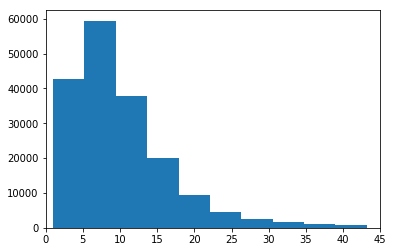

In [15]:
#attempted to plot common duration times for all trips
#excluded outlier durations by adding std to 75% quartile
df_wo_outliers = df.query('duration_mins < 43.173163')
plt.hist(data= df_wo_outliers, x = 'duration_mins')
plt.xlim(0,45)

Once outliers were excluded, we can see that the the most common trips were from 5-10 minutes with the duration tailing off as time increases.

### Exploring which Day(s) & Times are Peak Usage
We would expect that usage peaks on weekdays and broadly around rush hours for commutes. This will be based off of the start_times.

In [16]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,weekday,weekday_code,hour_time
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.75,Thursday,3,17


In [17]:
#value counts of bike useage for each day of the week
df['weekday'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: weekday, dtype: int64

Text(0,0.5,'Ride Counts')

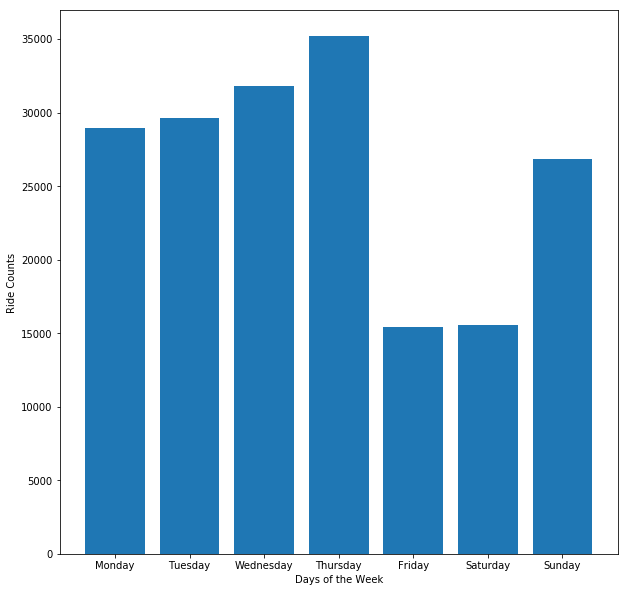

In [18]:
x=df['weekday_code'].unique()
y=df['weekday'].value_counts()
plt.figure(figsize=(10,10))
plt.bar(x,y)
plt.xticks((0,1,2,3,4,5,6),('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.xlabel('Days of the Week')
plt.ylabel('Ride Counts')

Ridership is concentrated from Sunday through Thursday with a steep dropoff on Friday & Saturday.

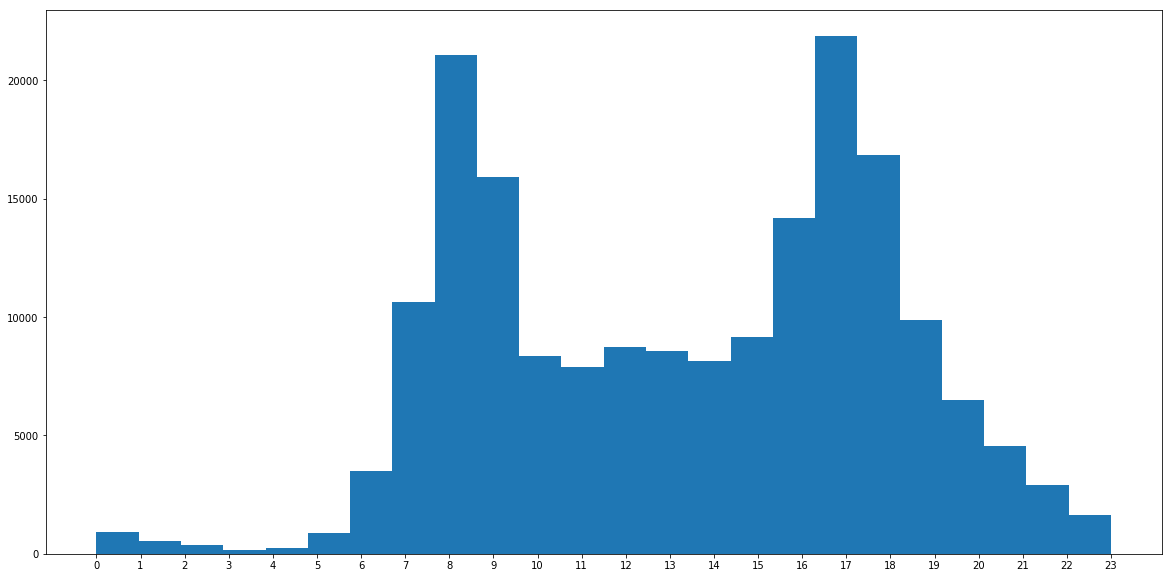

In [19]:
#graph hours of use
plt.figure(figsize=(20,10))
plt.hist(data= df, x ='hour_time', bins = 24)
plt.xticks((range(0,24,1)));

This histogram shows two peaks in usage: around 8 am and then again 5 pm, which is consistent with usage during peak commute hours.

### Exploring rider demographics: Type of rider, Gender, Age
It may be interesting to see customers vs. subscribers, the reported gender of riders and the common ages.

In [20]:
#remove nan values in order to graph birth years
df_birth_year = df['member_birth_year'].dropna()

#remove nan values in order to graph gender
df_gender = df['member_gender'].dropna()

In [21]:
df_birth_year.unique()

array([ 1984.,  1972.,  1989.,  1974.,  1959.,  1983.,  1988.,  1992.,
        1996.,  1993.,  1990.,  1981.,  1975.,  1978.,  1991.,  1997.,
        1986.,  2000.,  1982.,  1995.,  1980.,  1973.,  1985.,  1971.,
        1979.,  1967.,  1998.,  1994.,  1977.,  1999.,  1987.,  1969.,
        1963.,  1976.,  1964.,  1965.,  1961.,  1968.,  1966.,  1962.,
        1954.,  1958.,  1960.,  1970.,  1956.,  1957.,  1945.,  1900.,
        1952.,  1948.,  1951.,  1941.,  1950.,  1949.,  1953.,  1955.,
        1946.,  1947.,  1931.,  1943.,  1942.,  1920.,  1933.,  2001.,
        1878.,  1901.,  1944.,  1928.,  1934.,  1939.,  1930.,  1902.,
        1910.,  1938.,  1927.])

(array([  1.12000000e+02,   1.40000000e+01,   6.20000000e+01,
          4.09000000e+02,   1.00600000e+03,   2.47400000e+03,
          4.92400000e+03,   7.19200000e+03,   1.01360000e+04,
          1.42560000e+04,   2.68750000e+04,   4.22270000e+04,
          4.23910000e+04,   2.12800000e+04,   1.71200000e+03,
          0.00000000e+00,   0.00000000e+00]),
 array([1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980,
        1985, 1990, 1995, 2000, 2005, 2010, 2015]),
 <a list of 17 Patch objects>)

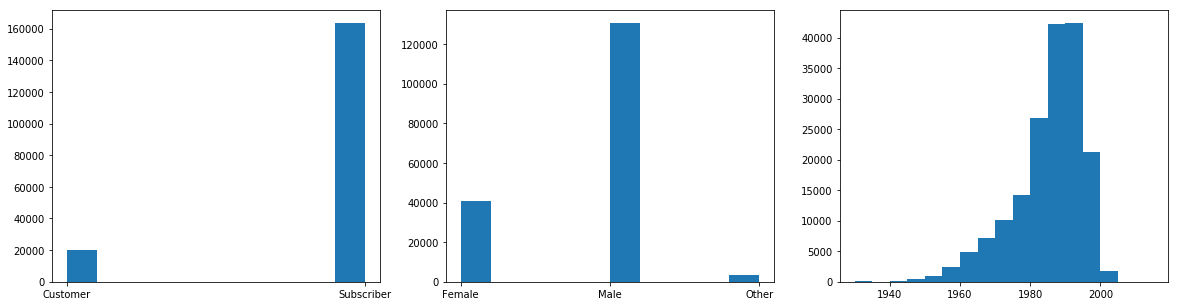

In [22]:
#display 3 subplot bar charts so can see the demogrpahics of riders
plt.figure(figsize=[20,5])

#type of rider
plt.subplot(1, 3, 1)
plt.hist(data=df, x='user_type')

#gender
plt.subplot(1, 3, 2)
plt.hist(df_gender)

#age
plt.subplot(1, 3, 3)
plt.hist(df_birth_year, bins=range(1930, 2020, 5))

These demographic plots show us that the majority of riders are subscribers, male, and born in the 1980s and 90s.

There are some outliers in the birth year dataset, so the histogram begins in 1930.

### Exploring popular start/end locations
By reviewing the start and end station locations, we can understand which stations are most frequently used.

In [23]:
#value count start and end locations to determine which stations are the most popular
df_popular_stations = df.start_station_name.value_counts() + df.end_station_name.value_counts()

In [24]:
#Determine the totol number of GoBike Stations
df.start_station_name.nunique()
#df.end_station_name.nunique()

329

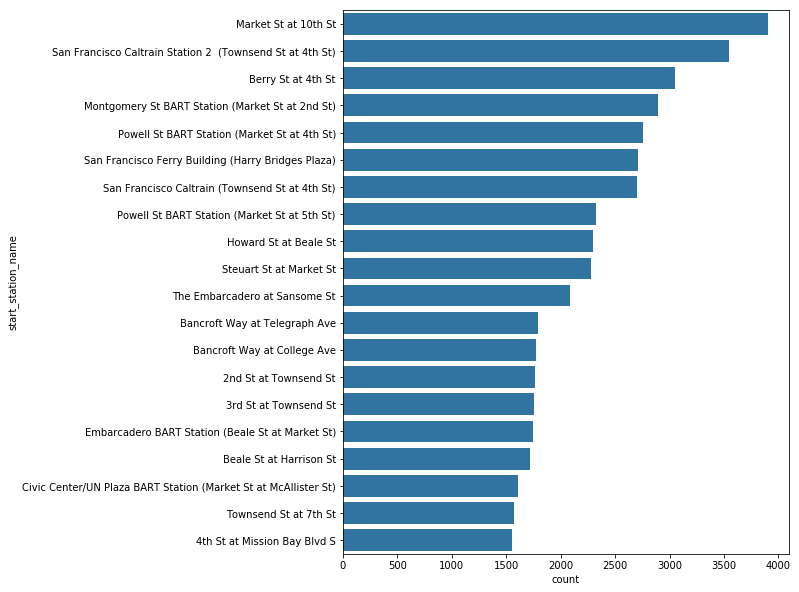

In [25]:
#graph frequency of each station being the start of a ride
plt.figure(figsize=(8,10))
base_color = sb.color_palette()[0]
freq = df.start_station_name.value_counts().iloc[:20]
gen_order=freq.index
sb.countplot(data=df, y='start_station_name',color=base_color, order=gen_order)

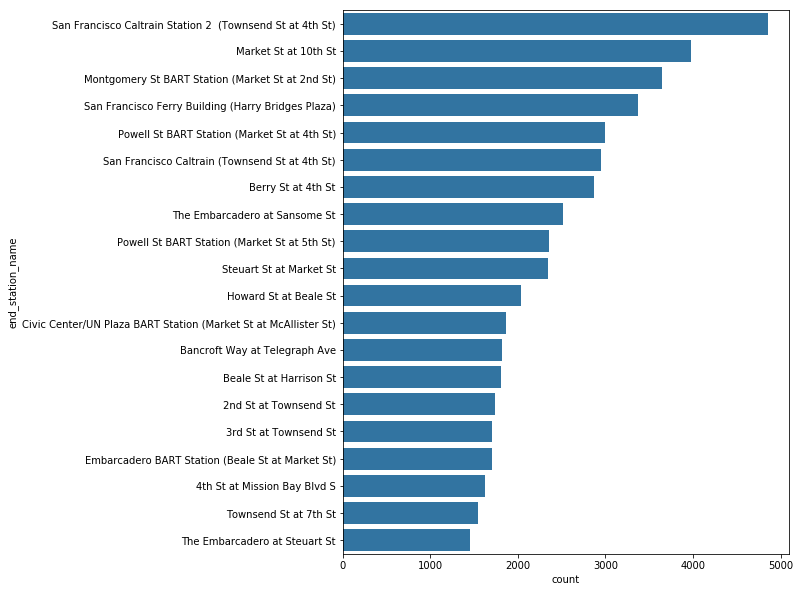

In [26]:
#graph frequency of a station being the end of a ride
plt.figure(figsize=(8,10))
base_color = sb.color_palette()[0]
freq = df.end_station_name.value_counts().iloc[:20]
gen_order=freq.index
sb.countplot(data=df, y='end_station_name',color=base_color, order=gen_order)

The above 2 graphs shows the top 20 most common start and stations. Notably many of these stations are located at BART stations and are duplicated, although not in exact order. 



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Our hypothesis is that GoBike users are primarily commuters in the San Francisco using the bikes to get from major public transportation to their place of work. The histogram of ride durations appears to support this as the curve skews right towards shorter 5-10 minute rides. The duel peaks of start times around 8 am and 5 pm also supports this idea.  The most common days of use being Sunday through Thursday might suggest users tend to be in the service industry or work four days a week, since we might expect activity to concentrate on Monday - Friday for a more office worker driven customer base.

> There were some outliers in length of check outs that make the histogram difficult to read. By excluding the outliers about the 75% percentile + standard deviation, we can focus on the bulk of useage.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> While I was surprised to see an uneven distribution of riders based on gender, the other rider demographics (rider type and birth year) appear consistent with our hypothesis. The top 20 station locations include a lot of Bart locations and locations along the Embarcadero which appears consistent with riders commuting into SF via public transportation and using GoBikes for the last portion of their ride.

> Some tidying was necessary to create the plots:
> * Extracted weekdays and time from the datestamp of each ride so those values could be plotted independently
> * Dropped Null rider information for gender and birth year to get tidier results. In both cases there were not many nulls and we cannot make assumptions about this demographic information.
> * Started the birth year table at 1930, both to omit outliers which appeared to be unlikely to be accurate.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

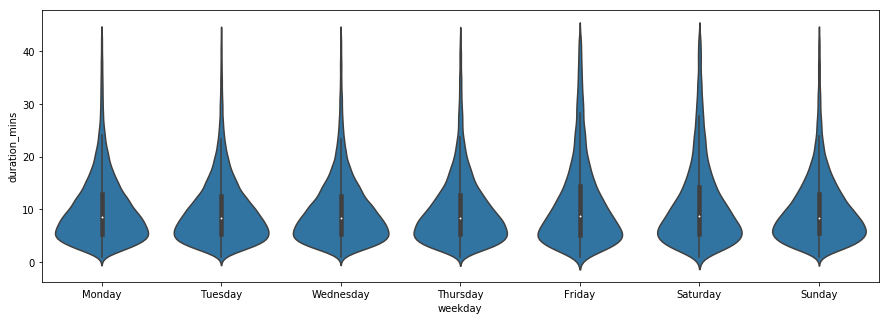

In [27]:
#Compare Length of Ride to Day of the Week usage
#violin plots using the dataframe with duration_mins outliers removed (df_wo_outliers)
plt.figure(figsize = [15,5])
base_color = sb.color_palette()[0]
sb.violinplot(data=df_wo_outliers, x='weekday', y='duration_mins', color=base_color)
plt.xticks((0,1,2,3,4,5,6),('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'));

The violin plot seems to suggest rides kept approimately the same duration throughout the week. Friday & Saturday appear to have a wider tail at the top of the violin, suggesting some riders were taking longer trips on those days.

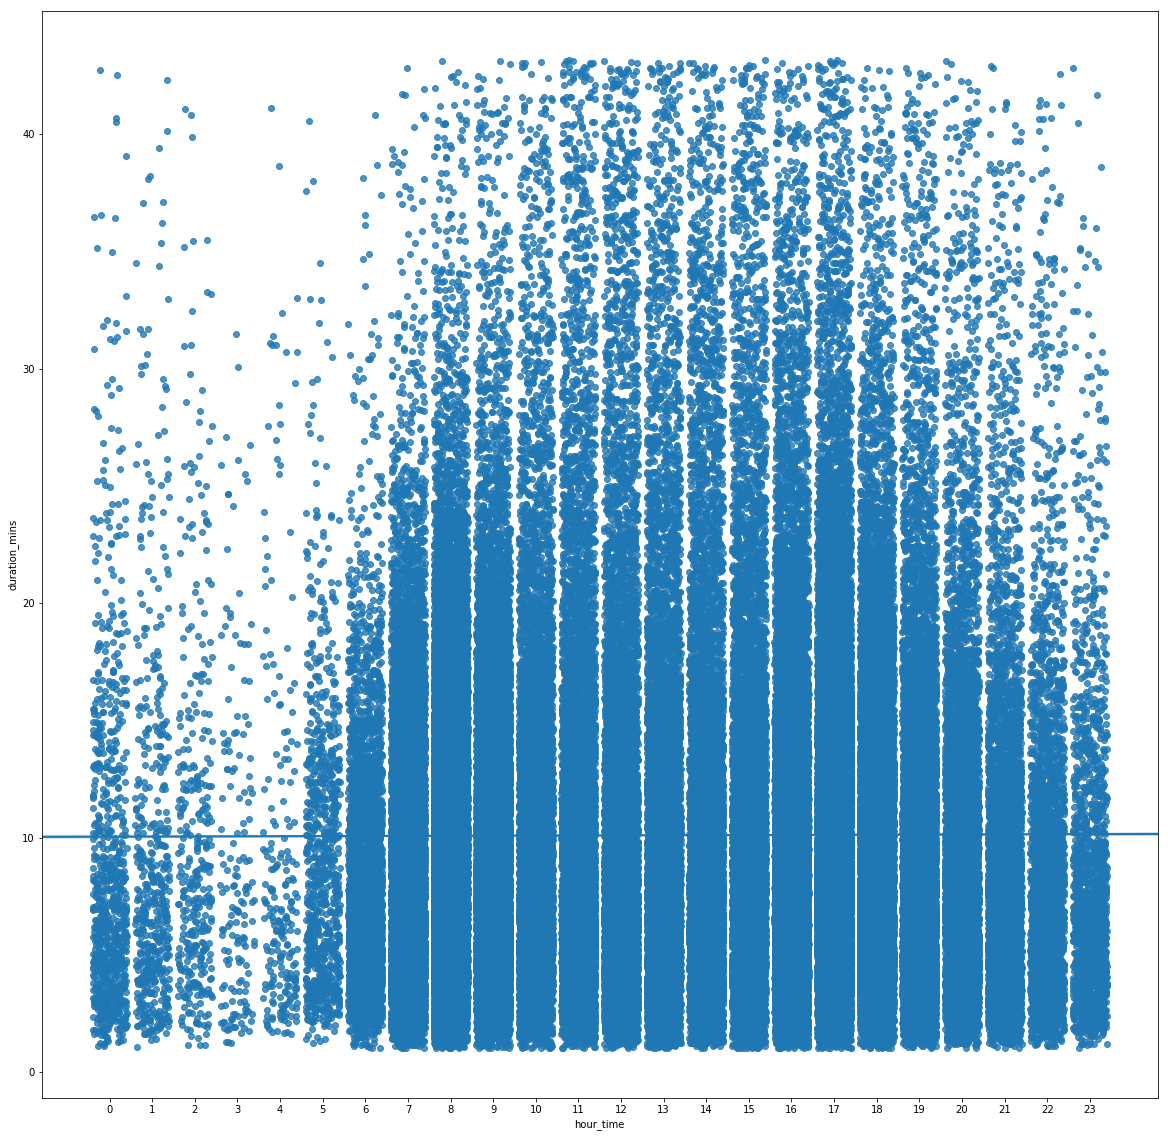

In [28]:
#What to know if shorter rides are concentrated around commute hours while longer rides occur outside of regular commuting hours
#Compare Length of Ride to Start times
#scatterplot
plt.figure(figsize=[20,20])
sb.regplot(data=df_wo_outliers, x='hour_time', y='duration_mins', x_jitter=0.4)
plt.xticks((range(0,24,1)));

From this scatterplot it appears that some longer rides do take during the day (in the 11 am - 4pm range) however short rides still dominate. I was surprised to see so many riders still using the service after midnight.

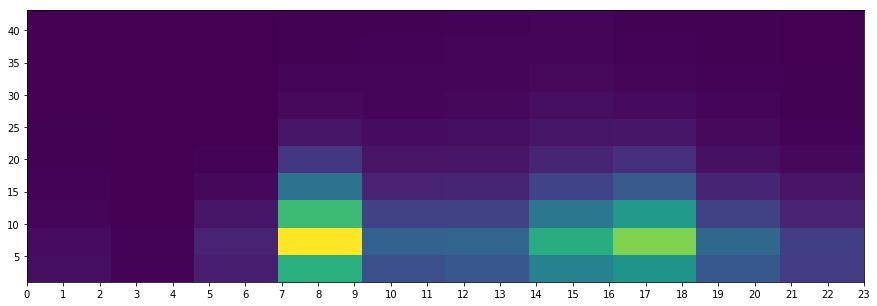

In [29]:
#heatmap plot of ride durations for each start time/hour
plt.figure(figsize = [15,5])
plt.hist2d(data=df_wo_outliers, x='hour_time', y='duration_mins');
plt.xticks((range(0,24,1)));

This box plot makes it more clear that there is little variation in the average ride time regardless of the hour in which the ride was started. The box plot considers a large number of the rides to still be outliers. 

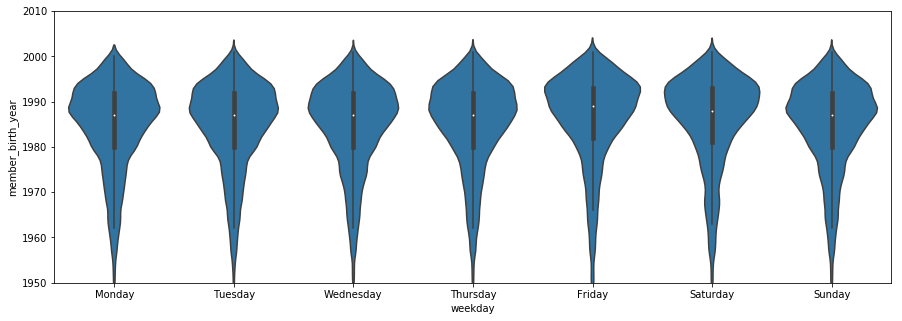

In [30]:
#birth year plotted agains weekday
#Are older or younger users likely to use the GoBikes on particular days?
#violin with weekdays on X & birth years on Y
plt.figure(figsize = [15,5])
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='weekday', y='member_birth_year', color=base_color)
plt.ylim(1950, 2010)
plt.xticks((0,1,2,3,4,5,6),('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'));

The age of riders appears to be stable across the week, with some shift to younger riders on Friday & Saturday.

In [31]:
#weekday counts for starting stations (top 10)
#identify count_values for top 10 start stations
top10_start = df.start_station_name.value_counts().iloc[:10].reset_index().rename(columns={'index': 'start_station_name', 'start_station_name': 'start_station_count'})

In [32]:
top10_start

,start_station_name,start_station_count
0,Market St at 10th St,3904
1,San Francisco Caltrain Station 2 (Townsend St...,3544
2,Berry St at 4th St,3052
3,Montgomery St BART Station (Market St at 2nd St),2895
4,Powell St BART Station (Market St at 4th St),2760
5,San Francisco Ferry Building (Harry Bridges Pl...,2710
6,San Francisco Caltrain (Townsend St at 4th St),2703
7,Powell St BART Station (Market St at 5th St),2327
8,Howard St at Beale St,2293
9,Steuart St at Market St,2283


In [33]:
top10_start2 = top10_start.merge(df, on='start_station_name', how='inner').drop(columns='start_station_count')
top10_start2.head()

,start_station_name,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,weekday,weekday_code,hour_time
0,Market St at 10th St,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58.0,37.776619,-122.417385,145.0,29th St at Church St,37.743684,-122.426806,5938,Subscriber,1992.0,Female,No,17.766667,Thursday,3,23
1,Market St at 10th St,401,2019-02-28 23:30:52.471,2019-02-28 23:37:33.955,58.0,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,5407,Subscriber,1990.0,Female,No,6.683333,Thursday,3,23
2,Market St at 10th St,371,2019-02-28 23:01:15.077,2019-02-28 23:07:26.459,58.0,37.776619,-122.417385,98.0,Valencia St at 16th St,37.765052,-122.421866,6435,Subscriber,1994.0,Male,No,6.183333,Thursday,3,23
3,Market St at 10th St,376,2019-02-28 23:00:05.223,2019-02-28 23:06:21.515,58.0,37.776619,-122.417385,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5731,Subscriber,1982.0,Male,No,6.266667,Thursday,3,23
4,Market St at 10th St,515,2019-02-28 22:28:11.347,2019-02-28 22:36:46.389,58.0,37.776619,-122.417385,321.0,5th St at Folsom,37.780146,-122.403071,5234,Subscriber,1981.0,Other,No,8.583333,Thursday,3,22


In [34]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

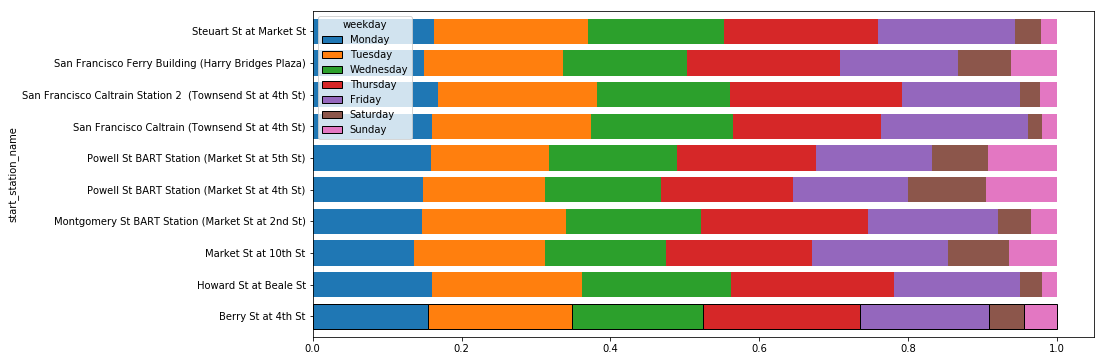

In [35]:
top10_start2.groupby('start_station_name')['weekday'].value_counts(normalize=True).unstack('weekday')[day_order].plot.barh(stacked=True, edgecolor='black',figsize=[14,6], rot=0, width=0.8);

This bar graph reveals relatively even usage of the top most frequent start stations on the weekdays, with considerably less usage on the weekends. It also suggests that the two stations around Powell St BART Station are the mostly frequencly used on the weekend.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> While we saw that fewer trips are taken on Fridays and Saturdays, the violin plot suggests that there is a slight increase in the duration of trips on those day. Shorter trips around the 10 minute mark appear to still dominate regardless of when a trip is started, however there is some evidence that people using the service outside of 'commuting hours' are using it for longer rides. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> While the weekday usage number seem to suggest that Fridays and Saturdays have fewer trips, the top 10 start stations are least utilized on Saturday and Sunday. This suggests that these stations are mainly used for commuting while other stations may see more relative activity on Sundays. User demographics, such as birth year do not seem to have any paricular impact on this data set.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [36]:
#create age groups
birth_groups = []
for year in df_wo_outliers['member_birth_year']:
    if (year >= 1900) and (year <= 1939):
        birth_groups.append('80+ years')
    elif (year >= 1940) and (year<= 1949):
        birth_groups.append('70-79 years')
    elif (year >= 1950) and (year<= 1959):
        birth_groups.append('60-69 years')
    elif (year >= 1960) and (year<= 1969):
        birth_groups.append('50-59 years')
    elif (year >= 1970) and (year<= 1979):
        birth_groups.append('40-49 years')
    elif (year >= 1980) and (year<= 1989):
        birth_groups.append('30-39 years')
    elif (year >= 1990) and (year<= 1999):
        birth_groups.append('20-29 years')
    elif (year is None):
        birth_groups.append('Unknown')
    else:
        birth_groups.append('19 years or less')

In [37]:
df_wo_outliers['birth_groups'] = birth_groups

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_wo_outliers.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,weekday,weekday_code,hour_time,birth_groups
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,Thursday,3,23,40-49 years


In [39]:
duration_mean = df_wo_outliers.groupby('weekday')['duration_mins'].mean().reset_index()
duration_mean

,weekday,duration_mins
0,Friday,10.037727
1,Monday,9.896962
2,Saturday,11.120791
3,Sunday,11.142988
4,Thursday,10.032073
5,Tuesday,9.793590
6,Wednesday,9.766913


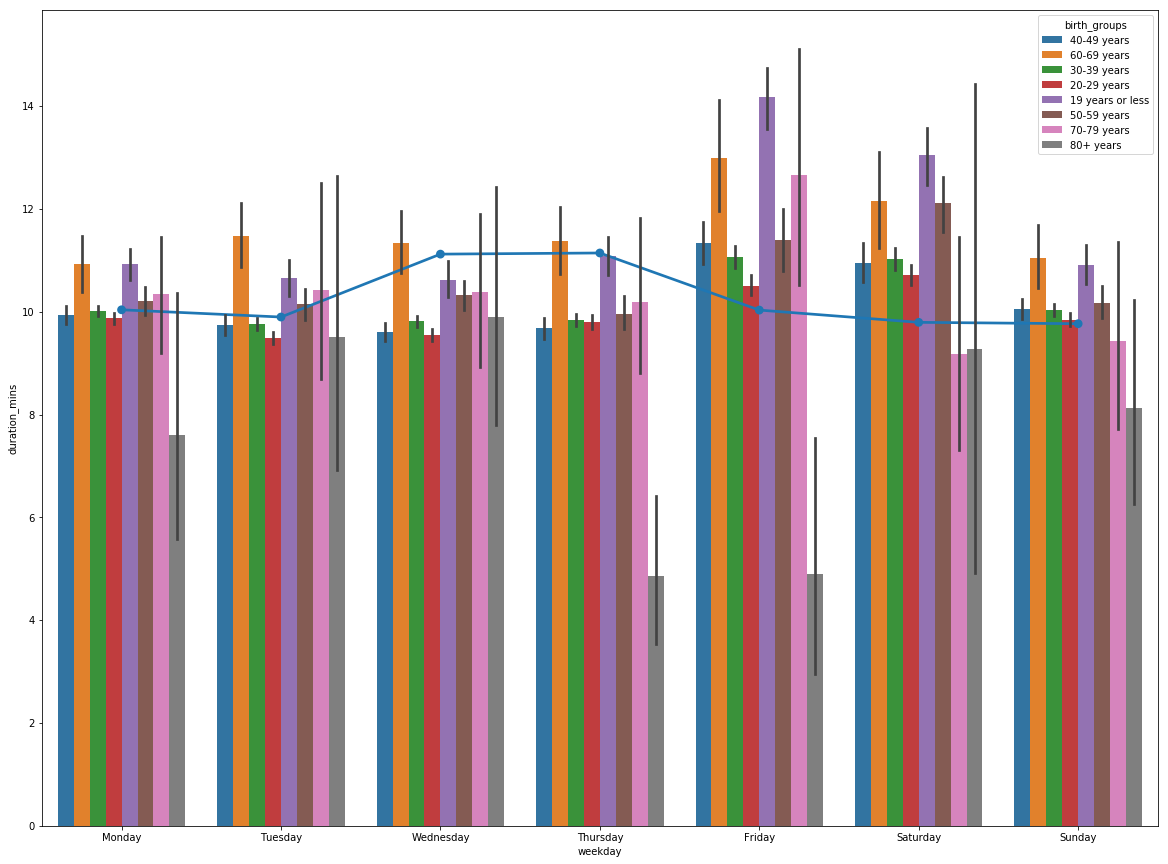

In [40]:
#bar plot of ride durations by weekday and birth/age groups to show if there is differences in the way age groups ride
plt.figure(figsize=[20,15])
sb.pointplot(data=duration_mean, x='weekday', y='duration_mins', zorder=1)
sb.barplot(data=df_wo_outliers, x='weekday', y='duration_mins', hue='birth_groups', zorder=0)
plt.xticks((0,1,2,3,4,5,6),('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'));

In [41]:
#percent of time stations is start vs. end of journey by weekday

In [42]:
#create a top 10 stations for end stations
top10_end = df.end_station_name.value_counts().iloc[:10].reset_index().rename(columns={'index': 'station_name', 'end_station_name': 'end_station_count'})
top10_end
#top10_end2 = top10_end.merge(df, on='end_station_name', how='inner').drop(columns='end_station_count')
#top10_end2

,station_name,end_station_count
0,San Francisco Caltrain Station 2 (Townsend St...,4857
1,Market St at 10th St,3973
2,Montgomery St BART Station (Market St at 2nd St),3647
3,San Francisco Ferry Building (Harry Bridges Pl...,3368
4,Powell St BART Station (Market St at 4th St),2997
5,San Francisco Caltrain (Townsend St at 4th St),2947
6,Berry St at 4th St,2872
7,The Embarcadero at Sansome St,2512
8,Powell St BART Station (Market St at 5th St),2353
9,Steuart St at Market St,2338


In [43]:
#rename column in top10_start so dfs can be merged into a single df
top10_start = top10_start.rename(columns={'start_station_name': 'station_name'})
top10_start

,station_name,start_station_count
0,Market St at 10th St,3904
1,San Francisco Caltrain Station 2 (Townsend St...,3544
2,Berry St at 4th St,3052
3,Montgomery St BART Station (Market St at 2nd St),2895
4,Powell St BART Station (Market St at 4th St),2760
5,San Francisco Ferry Building (Harry Bridges Pl...,2710
6,San Francisco Caltrain (Townsend St at 4th St),2703
7,Powell St BART Station (Market St at 5th St),2327
8,Howard St at Beale St,2293
9,Steuart St at Market St,2283


In [44]:
#create top stations list
top_stations = top10_start.merge(top10_end, on='station_name', how='outer').drop(columns=['start_station_count', 'end_station_count'])
top_stations  = top_stations['station_name'].tolist()
top_stations

['Market St at 10th St',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'Berry St at 4th St',
 'Montgomery St BART Station (Market St at 2nd St)',
 'Powell St BART Station (Market St at 4th St)',
 'San Francisco Ferry Building (Harry Bridges Plaza)',
 'San Francisco Caltrain (Townsend St at 4th St)',
 'Powell St BART Station (Market St at 5th St)',
 'Howard St at Beale St',
 'Steuart St at Market St',
 'The Embarcadero at Sansome St']

In [45]:
#create df of top stations regardless of if the station appears in the start or end station names
df_top_stations = df_wo_outliers.query('start_station_name ==@ top_stations or end_station_name ==@ top_stations')
df_top_stations.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,weekday,weekday_code,hour_time,birth_groups
26,385,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,6531,Customer,2000.0,Male,No,6.416667,Thursday,3,23,19 years or less
38,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58.0,Market St at 10th St,37.776619,-122.417385,145.0,29th St at Church St,37.743684,...,5938,Subscriber,1992.0,Female,No,17.766667,Thursday,3,23,20-29 years
42,1554,2019-02-28 23:20:24.089,2019-02-28 23:46:19.019,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,...,5411,Subscriber,1972.0,Male,No,25.900000,Thursday,3,23,40-49 years
45,717,2019-02-28 23:33:21.095,2019-02-28 23:45:18.510,9.0,Broadway at Battery St,37.798572,-122.400869,58.0,Market St at 10th St,37.776619,...,6581,Subscriber,1980.0,Male,No,11.950000,Thursday,3,23,30-39 years
54,401,2019-02-28 23:30:52.471,2019-02-28 23:37:33.955,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,...,5407,Subscriber,1990.0,Female,No,6.683333,Thursday,3,23,20-29 years


In [46]:
start_by_day = df_top_stations.groupby('weekday')['start_station_name'].value_counts().rename().reset_index().rename(columns={'weekday':'day', 'start_station_name':'station_name', 0:'start_count'}).query('station_name ==@ top_stations')
start_by_day.head()

,day,station_name,start_count
0,Friday,Market St at 10th St,709
1,Friday,San Francisco Caltrain Station 2 (Townsend St...,555
2,Friday,San Francisco Caltrain (Townsend St at 4th St),529
3,Friday,Berry St at 4th St,526
4,Friday,Montgomery St BART Station (Market St at 2nd St),499


In [47]:
end_by_day = df_top_stations.groupby('weekday')['end_station_name'].value_counts().rename().reset_index().rename(columns={'weekday':'day', 'end_station_name':'station_name', 0:'end_count'}).query('station_name ==@ top_stations')
end_by_day.head()

,day,station_name,end_count
0,Friday,San Francisco Caltrain Station 2 (Townsend St...,757
1,Friday,Market St at 10th St,698
2,Friday,Montgomery St BART Station (Market St at 2nd St),631
3,Friday,San Francisco Caltrain (Townsend St at 4th St),562
4,Friday,San Francisco Ferry Building (Harry Bridges Pl...,541


In [48]:
top_stations_df = start_by_day.merge(end_by_day, on=['station_name','day'], how='inner')
top_stations_df.head()

,day,station_name,start_count,end_count
0,Friday,Market St at 10th St,709,698
1,Friday,San Francisco Caltrain Station 2 (Townsend St...,555,757
2,Friday,San Francisco Caltrain (Townsend St at 4th St),529,562
3,Friday,Berry St at 4th St,526,509
4,Friday,Montgomery St BART Station (Market St at 2nd St),499,631


In [51]:
#g=sb.PairGrid(data=top_stations_df, x_vars=['start_count','end_count'], y_vars=['station_name','day'])
#g.map(sb.barplot)
#sb.barplot(data=top_stations_df, x='day', y='start_count', hue='station_name')
#sb.barplot(data=top_stations_df, x='day', y='end_count')

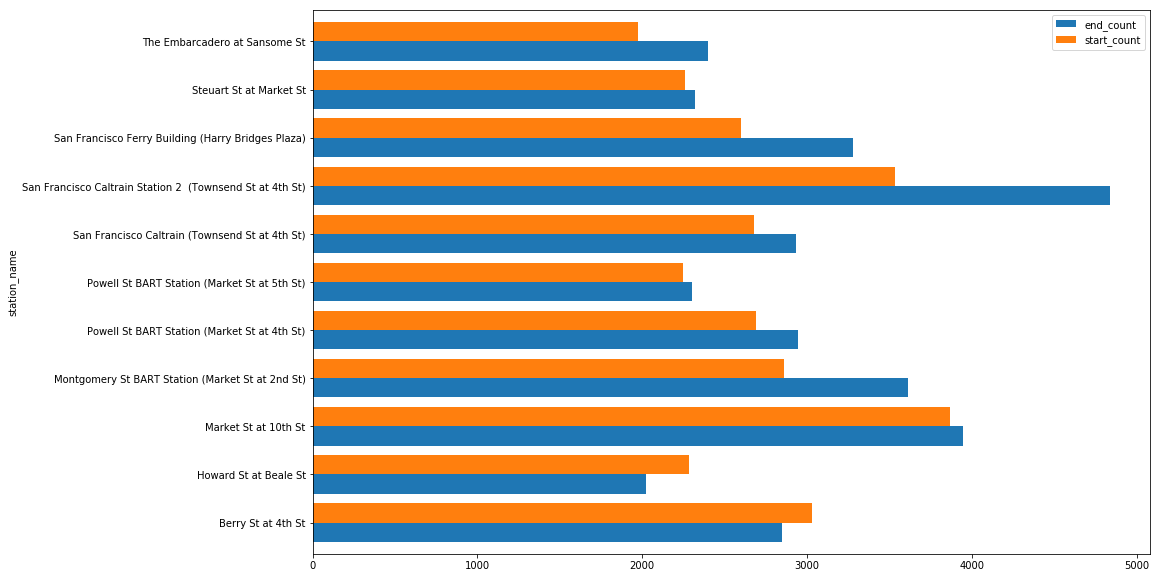

In [62]:
top_stations_df.groupby('station_name')['end_count','start_count'].sum().plot.barh(figsize=[15,10], rot=0, width=0.8)



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

